# <span style="color:palevioletred">Laboratorio de regresión logística</span>

|                |   |
:----------------|---|
| **Nombre**     | Ana Sofía Hinojosa Bale   |
| **Fecha**      | 6 de octubre 2025  |
| **Expediente** | 742594  | 

In machine learning, Support Vector Machines (SVM) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. It is mostly used in classification problems. In this algorithm, each data item is plotted as a point in p-dimensional space (where p is the number of features), with the value of each feature being the value of a particular coordinate. Then, classification is performed by finding the hyper-plane that best differentiates the two classes (or more if we have a multi class problem):

$$ f(x) = w^T \varphi(x) + b $$

where $\varphi: X \rightarrow F $ is a function that makes each input point $x$ correspond to a point in F, where F is a Hilbert space.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification, implicitly mapping their inputs into high-dimensional feature spaces (more specifically using the kernel trick, like the RBF funcion). 

[1]

OLS utilizes the squared residuals to fit the parameters. Large residuals caused by outliers may worsen the accuracy significantly.

Support Vectors use piecewise linear functions to counter this, in which a hyperparameter  $\epsilon$ called the margin lets errors that are less or equal to it be 0, and error larger than it be $e - \epsilon$. 

The problem to solve is:

\begin{split}
        \min_{w, b, \xi, \xi^*} \mathcal{P}_\epsilon(w, b, \xi) &= \frac{1}{2} w^T w + c \sum_{k=1}^{N} \xi_k \\
        \text{s.t. } & y_k [w^T \varphi(x_k) - b] \geq 1- \xi_k,\ \ k = 1, ..., N \\
        & \xi_k \geq 0,\ \ k = 1, ..., N
\end{split}


The most important question that arises when using a SVM is how to choose the correct hyperplane. Consider the following scenarios:

### Scenario 1

In this scenario there are three hyperplanes called A, B, and C. Now, the problem is to identify the hyperplane which best differentiates the stars and the circles.

<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/SVM_21-2.png" alt="what image shows"></center>

In this case, hyperplane B separates the stars and the circle betters, hence it is the correct hyperplane.


### Scenario 2

Now take another scenario where all three hyperplanes are segregating classes well. The question that arises is how to choose the best hyperplane in this situation.

<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/SVM_4-2.png" alt="what image shows"></center>

In such scenarios, we calculate the margin (which is the distance between nearest data point and the hyperplane). The hyperplane with the largest margin will be considered as the correct hyperplane to classify the dataset.

Here C has the largest margin. Hence, it is considered as the best hyperplane.


### Kernels
Knowing 
$$ w = \sum_{k=1}^{N} \alpha_k y_k \varphi(x_k) $$

And
$$ y_{pred} = w^T \varphi(x) + b $$

Then 
$$ y_{pred} = (\sum_{k=1}^{N} \alpha_k y_k \varphi(x_k))^T \varphi(x) + b $$

Where $\varphi$ is a function that makes each input in $x$ correspond to a point in $F$ (a Hilbert space). This can be seen as processing and transforming the input featuers to keep the model's convexity. [2]

This also allows us to transform the inputs into another space where they might be more easily classified.

<center><img src=https://miro.medium.com/max/838/1*gXvhD4IomaC9Jb37tzDUVg.png alt="what image shows"></center>

## ROC and AUC

A ROC (Receiver Operating Characteristic) is a graph that shows how the classification model performs at the classification thresholds. 

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better. [3]

True Positive Rate is a synonym for Recall and defined as:
$$ TPR = \frac{TP}{TP + FN} $$

False Positive Rate is a synonym for Specificity and defined as:

$$ FPR = \frac{FP}{FP + TN} $$

ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-label classification, it is necessary to binarize the output. One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

E.g. If you lower a classification threshold, more items would be classified as positive, increasing False Positives and True Positives.

AUC stands for Area under the ROC.

## Ejercicio 1

- Utiliza el dataset `Iris`, modela con SVC y haz Cross-Validation de diferentes kernels ('linear', 'poly', 'rbf', 'sigmoid').
- Modela con LogisticRegression.
- El método de Cross-Validation es K-Folds con $k=10$.
- Utiliza el AUC como métrico de Cross-Validation.
- Compara resultados.

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
import warnings

warnings.filterwarnings('ignore')


In [28]:
data  = load_iris()
x = data.data
y = data.target
scaler = StandardScaler()
x = scaler.fit_transform(x)
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

In [29]:
def run_model(x:np.ndarray , y: np.ndarray) -> dict:
    kf = KFold(n_splits=10, shuffle=True)

    svm_results = {}
    for kernel in kernels:
        svm_model = SVC(kernel=kernel, probability=True, max_iter=1000)  
        scores = cross_val_score(svm_model, x, y, cv=kf, scoring='roc_auc_ovr')
        svm_results[kernel] = {
            'mean': scores.mean(),
            'std': scores.std()
        }

    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(x, y)
    lr_scores = cross_val_score(lr_model, x, y, cv=kf, scoring='roc_auc_ovr')
    lr_predict = lr_model.predict_proba(x)[:, 1]
    lr_results = {
        'mean': lr_scores.mean(),
        'std': lr_scores.std(),
        'predictions': lr_predict
    }

    print("SVM Results:")
    for kernel, result in svm_results.items():
        print(f"{kernel}: AUC = {result['mean']:.4f} ± {result['std']:.4f}")
    print(f"\nLogistic Regression: AUC = {lr_results['mean']:.4f} ± {lr_results['std']:.4f}")  

    return {
        'svm_results': svm_results,
        'lr_results': lr_results
    }

In [30]:
def plot(result: dict) -> None:

    svm_means = [result['svm_results'][k]['mean'] for k in kernels]
    svm_stds = [result['svm_results'][k]['std'] for k in kernels]
    lr_mean = result['lr_results']['mean']
    lr_std = result['lr_results']['std'] 
    plt.figure(figsize=(10, 6))
    sns.barplot(x=kernels, y=svm_means, yerr=svm_stds, label='SVM', color='palevioletred', alpha=0.7, width=0.4)
    sns.barplot(x=['lr'], y=[lr_mean], yerr=[lr_std], label='Logistic Regression', color='lightblue', width=0.4)
    plt.title('SVM Kernel Comparison')
    plt.ylabel('AUC')
    plt.xlabel('Kernel')
    plt.legend()
    plt.grid(linestyle=':', alpha=0.5)
    plt.show()

In [31]:
def plot_roc(x, y, kernels=None):
    if kernels is None:
        kernels = ['linear', 'poly', 'rbf', 'sigmoid']

    models = {'Logistic Regression': LogisticRegression(max_iter=1000)}
    for k in kernels:
        models[f'SVM ({k})'] = SVC(kernel=k, probability=True, max_iter=1000)

    classes = np.unique(y)
    n_classes = len(classes)
    y_bin = label_binarize(y, classes=classes) if n_classes > 2 else y

    for model_name, model in models.items():
        model.fit(x, y)
        y_prob = model.predict_proba(x)

        plt.figure(figsize=(7,5))

        if n_classes == 2:
            pos_index = list(model.classes_).index(classes[1])
            y_scores = y_prob[:, pos_index]
            fpr, tpr, _ = roc_curve(y, y_scores)
            auc_value = roc_auc_score(y, y_scores)
            plt.plot(fpr, tpr, lw=2, color='palevioletred')
            plt.fill_between(fpr, tpr, alpha=0.2, color='palevioletred')
        else:
            fpr, tpr, roc_auc = dict(), dict(), dict()
            for i, c in enumerate(classes):
                fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
                roc_auc[i] = roc_auc_score(y_bin[:, i], y_prob[:, i])

            all_fpr = np.linspace(0, 1, 100)
            mean_tpr = np.mean([np.interp(all_fpr, fpr[i], tpr[i]) for i in classes], axis=0)
            mean_auc = np.mean(list(roc_auc.values()))
            plt.plot(all_fpr, mean_tpr, lw=2, color='palevioletred')
            plt.fill_between(all_fpr, mean_tpr, alpha=0.2, color='palevioletred')
            
            
        plt.title(f'ROC Curve: {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.grid(linestyle=':', alpha=0.5)
        plt.show()



In [32]:
first_result = run_model(x, y)

SVM Results:
linear: AUC = 0.9929 ± 0.0144
rbf: AUC = 0.9953 ± 0.0073
poly: AUC = 0.9947 ± 0.0084
sigmoid: AUC = 0.9770 ± 0.0267

Logistic Regression: AUC = 0.9973 ± 0.0080


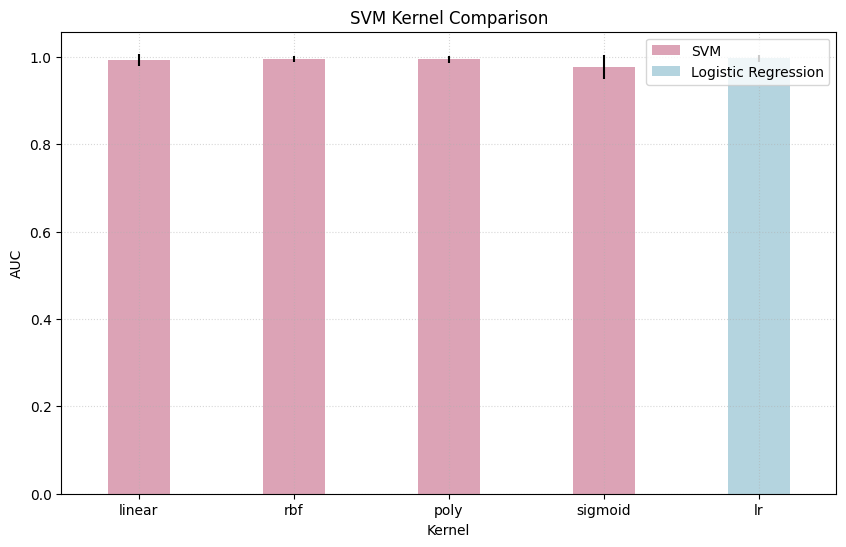

In [33]:
plot(first_result)

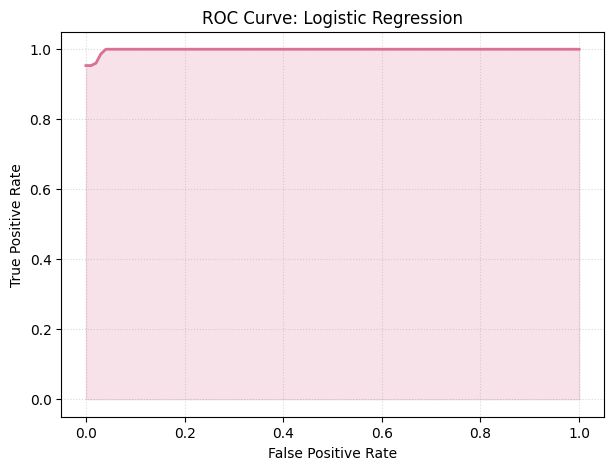

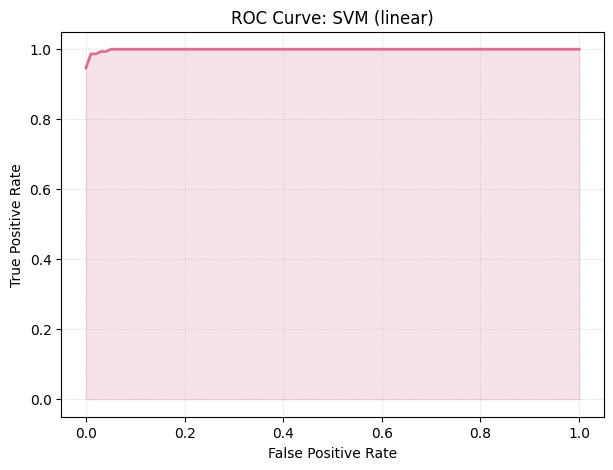

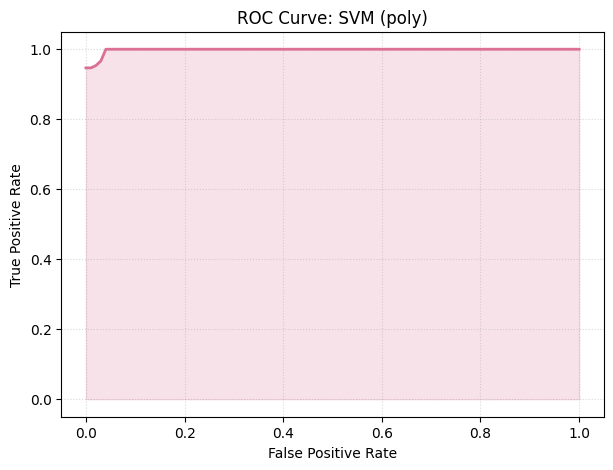

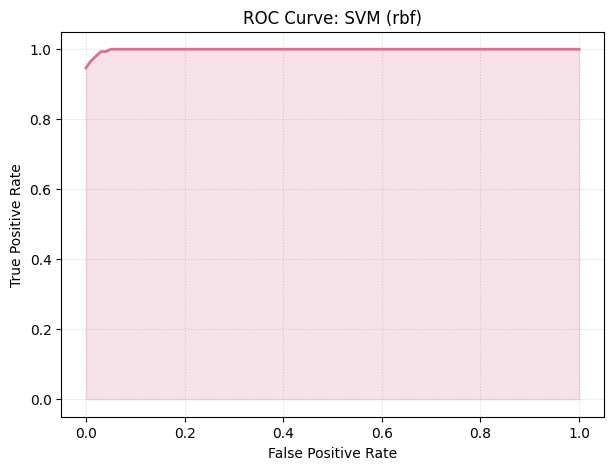

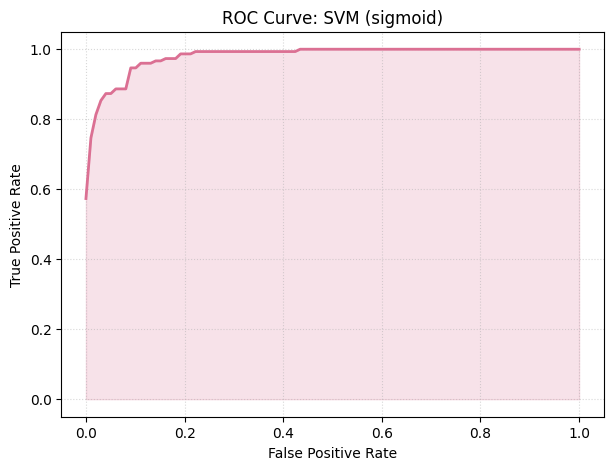

In [34]:
plot_roc(x, y)

## Ejercicio 2
- Repite el ejercicio 1 con el dataset `Default`. Utiliza `default` como target.

In [35]:
data = pd.read_csv('Default.csv')
x = data.drop(columns=['default'])
x['student'] = x['student'] == 'Yes'
y = data['default'] == 'Yes'
x = scaler.fit_transform(x)
y = y.to_numpy()

In [36]:
second_result = run_model(x, y)

SVM Results:
linear: AUC = 0.9356 ± 0.0201
rbf: AUC = 0.8410 ± 0.0327
poly: AUC = 0.7643 ± 0.1250
sigmoid: AUC = 0.7365 ± 0.0247

Logistic Regression: AUC = 0.9506 ± 0.0150


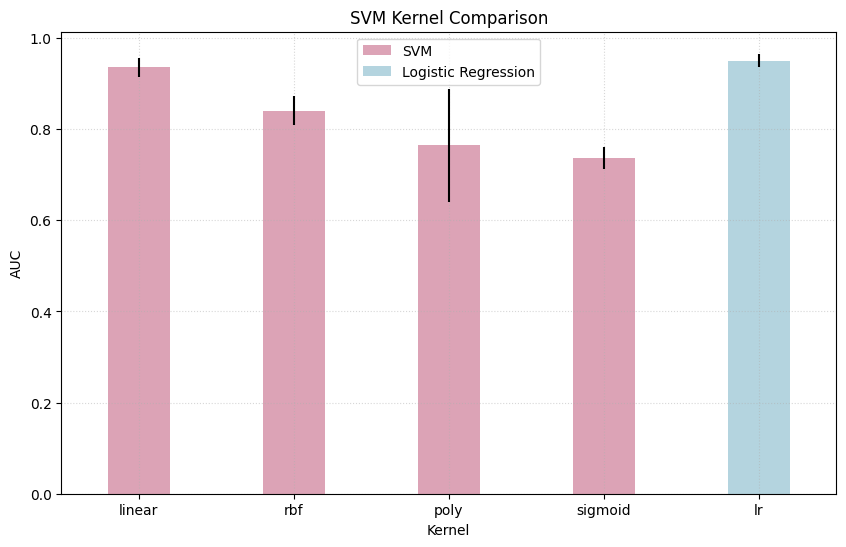

In [37]:
plot(second_result)

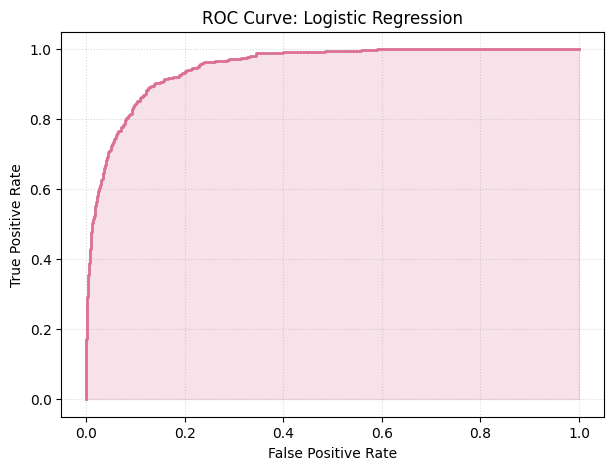

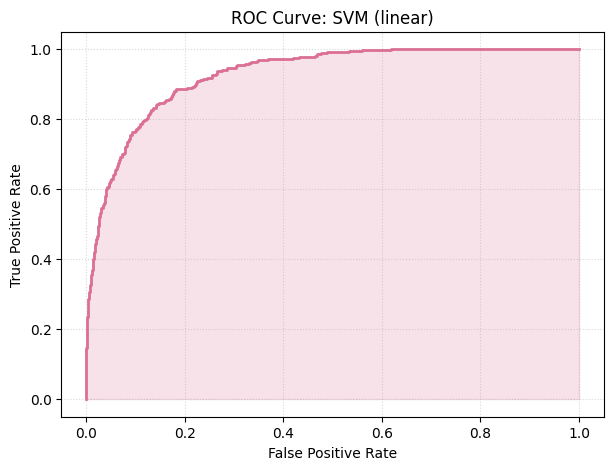

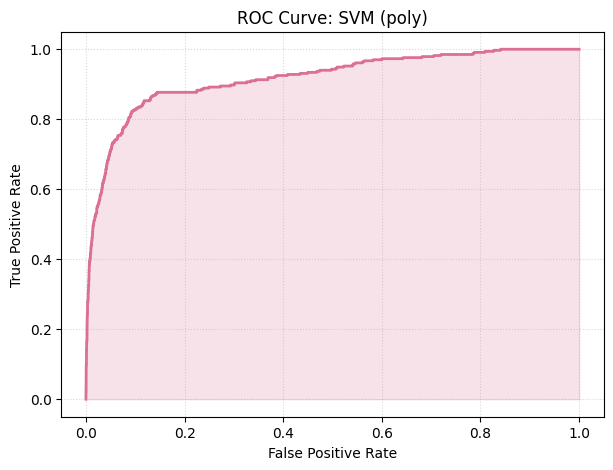

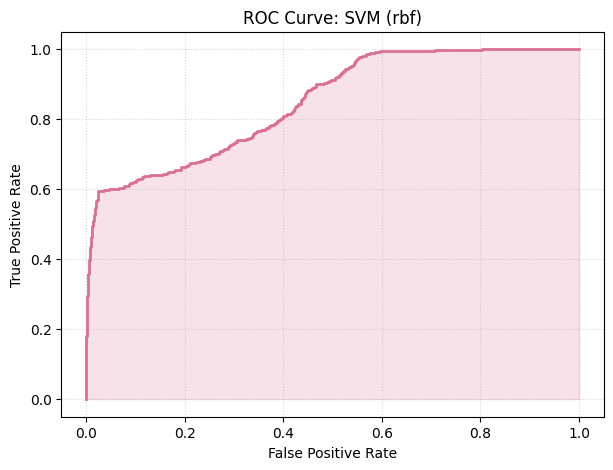

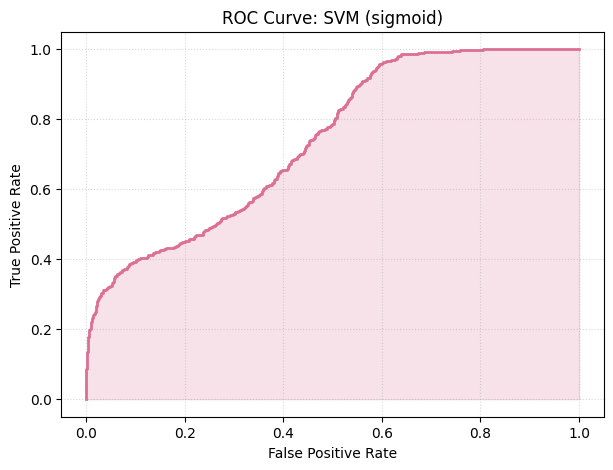

In [38]:
plot_roc(x, y)

# Addendum

Métricos disponibles para clasificación:
- ‘accuracy’
- ‘balanced_accuracy’
- ‘top_k_accuracy’
- ‘average_precision’
- ‘neg_brier_score’
- ‘f1’
- ‘f1_micro’
- ‘f1_macro’
- ‘f1_weighted’
- ‘f1_samples’
- ‘neg_log_loss’
- ‘precision’ etc.
- ‘recall’ etc.
- ‘jaccard’ etc.
- ‘roc_auc’
- ‘roc_auc_ovr’
- ‘roc_auc_ovo’
- ‘roc_auc_ovr_weighted’
- ‘roc_auc_ovo_weighted’
- ‘d2_log_loss_score’

# References

[1] Shigeo Abe.Support Vector Machines for Pattern Classification,2Ed.Springer-Verlag London,2010. ISBN978-1-84996-097-7. URLhttps://www.springer.com/gp/book/9781849960977.

[2] Johan A K Suykens, Tony Van Gestel, Jos De Brabanter, BartDe Moor, and Joos Vandewalle.Least Squares Support VectorMachines. World Scientific,2002. ISBN9789812381514. URLhttps://www.worldscientific.com/worldscibooks/10.1142/5089.

[3] Bradley, A. P. (1997). The use of the area under the ROC curve in the evaluation of machine learning algorithms. Pattern recognition, 30(7), 1145-1159. URL https://www.researchgate.net/post/how_can_I_interpret_the_ROC_curve_result